In [1]:
import openrouteservice
import geopandas as gpd
import contextily as cx
import numpy as np
import pandas as pd
from shapely.geometry import Polygon
import shapely
from tqdm.notebook import tqdm


In [2]:
client = openrouteservice.Client(key="5b3ce3597851110001cf6248054a21485d37496fa1d17dd0a910a316")  # Specify your personal API key


In [3]:
def create_grid(gdf, n_cells=10):
    xmin, ymin, xmax, ymax = gdf.total_bounds
    # how many cells across and down
    cell_size = (xmax - xmin) / n_cells
    # projection of the grid
    crs = 4326
    # create the cells in a loop
    grid_cells = []
    for x0 in np.arange(xmin, xmax + cell_size, cell_size):
        for y0 in np.arange(ymin, ymax + cell_size, cell_size):
            # bounds
            x1 = x0 - cell_size
            y1 = y0 + cell_size
            grid_cells.append(shapely.geometry.box(x0, y0, x1, y1))
    cell = gpd.GeoDataFrame(grid_cells, columns=["geometry"], crs=crs)
    return cell


  0%|          | 0/25 [00:00<?, ?it/s]

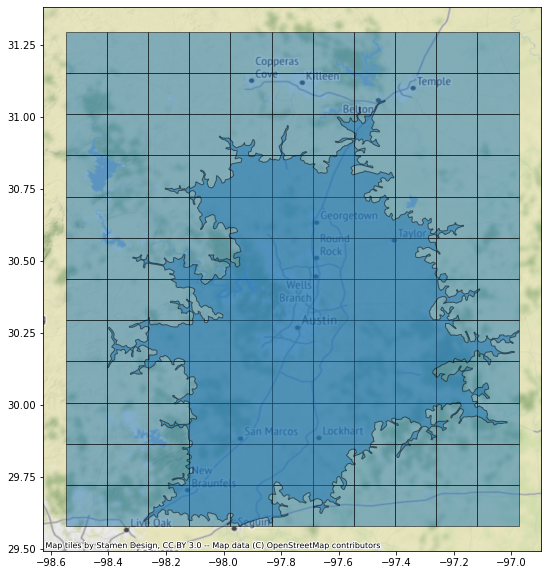

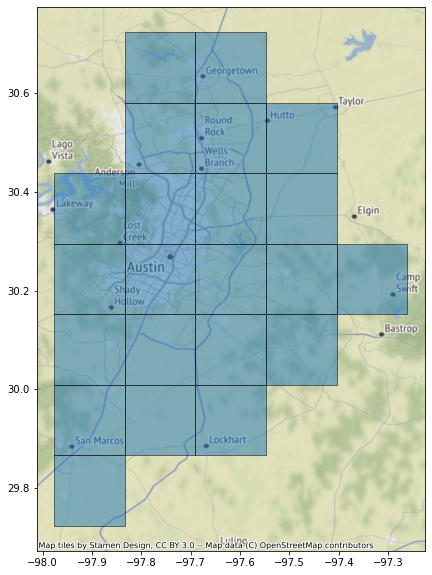

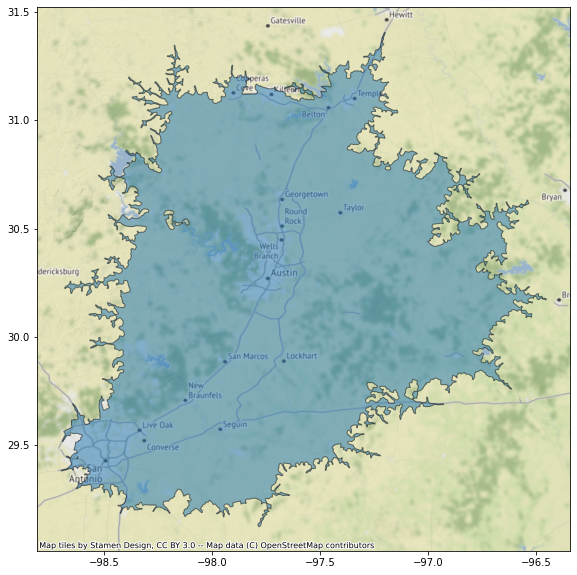

In [29]:
# coords = ((8.34234,48.23424),(8.34423,48.26424))

# AUSTIN TEXAS
start_location = [[-97.74337082777046, 30.26979974677902]]
range_hours = 1
isochrones = client.isochrones(start_location, range=[range_hours * 60 * 60], units="m", profile="driving-car")
gdf = gpd.GeoDataFrame.from_features(isochrones, crs=4326)
gdf_cells = create_grid(gdf)

ax = gdf_cells.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
gdf.plot(ax=ax, alpha=0.5, edgecolor="k")
cx.add_basemap(ax, crs=gdf.crs)

merged = gpd.sjoin(gdf_cells, gdf, how="left", predicate="within")
selected_cells = merged[merged["index_right"].notnull()]
ax = selected_cells.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")

cx.add_basemap(ax, crs=selected_cells.crs)
union = selected_cells.geometry.unary_union
verticies = list(union.exterior.coords)

all_secondary_gdfs = []
for i in tqdm(verticies):
    start_location = [list(i)]
    isochrones = client.isochrones(start_location, range=[range_hours * 60 * 60], units="m", profile="driving-car")
    gdf = gpd.GeoDataFrame.from_features(isochrones, crs=4326)
    all_secondary_gdfs.append(gdf)

gdf_second = pd.concat(all_secondary_gdfs)
gdf_out = gpd.GeoDataFrame(index=[0], geometry=[gdf_second.unary_union])
ax = gdf_out.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax, crs=selected_cells.crs)

gdf_out.to_file("austin.gpkg")


  0%|          | 0/21 [00:00<?, ?it/s]

/opt/anaconda3/envs/jupe/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


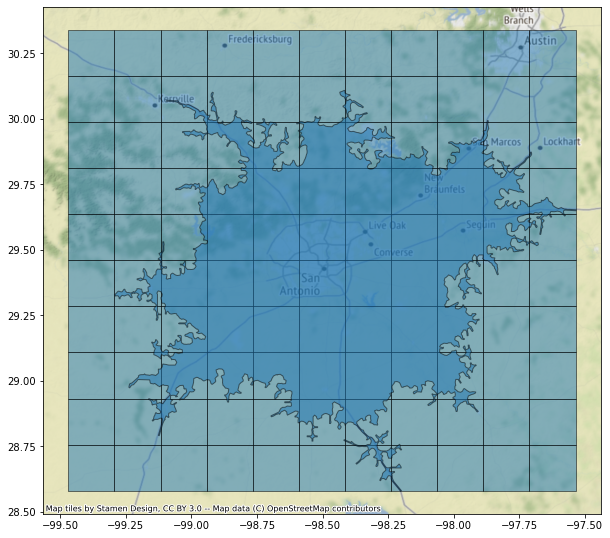

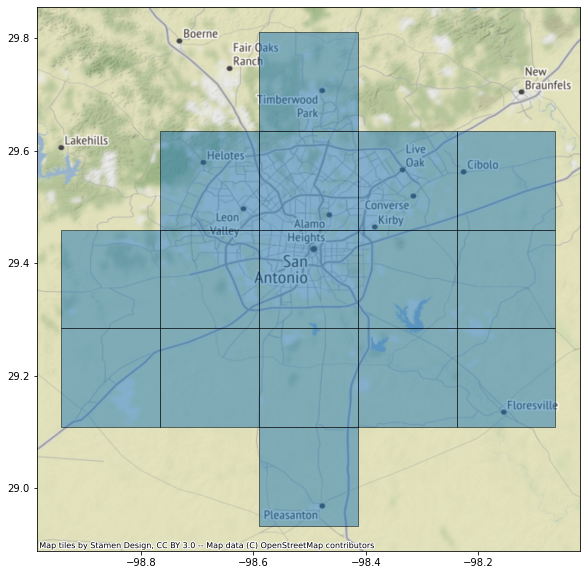

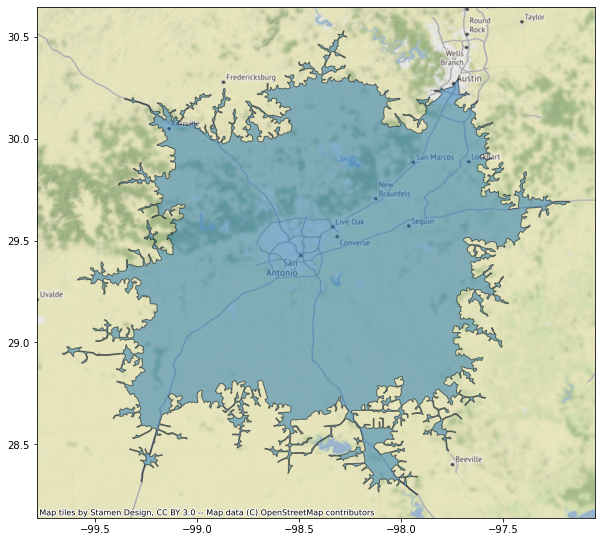

In [4]:
# coords = ((8.34234,48.23424),(8.34423,48.26424))

# San Antonio TEXAS
start_location = [[-98.4876075376991, 29.424819466143717]]
range_hours = 1
isochrones = client.isochrones(start_location, range=[range_hours * 60 * 60], units="m", profile="driving-car")
gdf = gpd.GeoDataFrame.from_features(isochrones, crs=4326)
gdf_cells = create_grid(gdf)

ax = gdf_cells.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
gdf.plot(ax=ax, alpha=0.5, edgecolor="k")
cx.add_basemap(ax, crs=gdf.crs)

merged = gpd.sjoin(gdf_cells, gdf, how="left", predicate="within")
selected_cells = merged[merged["index_right"].notnull()]
ax = selected_cells.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")

cx.add_basemap(ax, crs=selected_cells.crs)
union = selected_cells.geometry.unary_union
verticies = list(union.exterior.coords)

all_secondary_gdfs = []
for i in tqdm(verticies):
    start_location = [list(i)]
    isochrones = client.isochrones(start_location, range=[range_hours * 60 * 60], units="m", profile="driving-car")
    gdf = gpd.GeoDataFrame.from_features(isochrones, crs=4326)
    all_secondary_gdfs.append(gdf)

gdf_second = pd.concat(all_secondary_gdfs)
gdf_out = gpd.GeoDataFrame(index=[0], geometry=[gdf_second.unary_union])
ax = gdf_out.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax, crs=selected_cells.crs)

gdf_out.to_file("san-antonio.gpkg")